## Decision Tree

#### Step-1 Reading Data

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Checking Null Values

In [5]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

- So as we can see we don't have null values in our dataset.

### Step-2 EDA

In [6]:
import seaborn as sns

In [7]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [8]:
corr = df.corr()
corr 

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


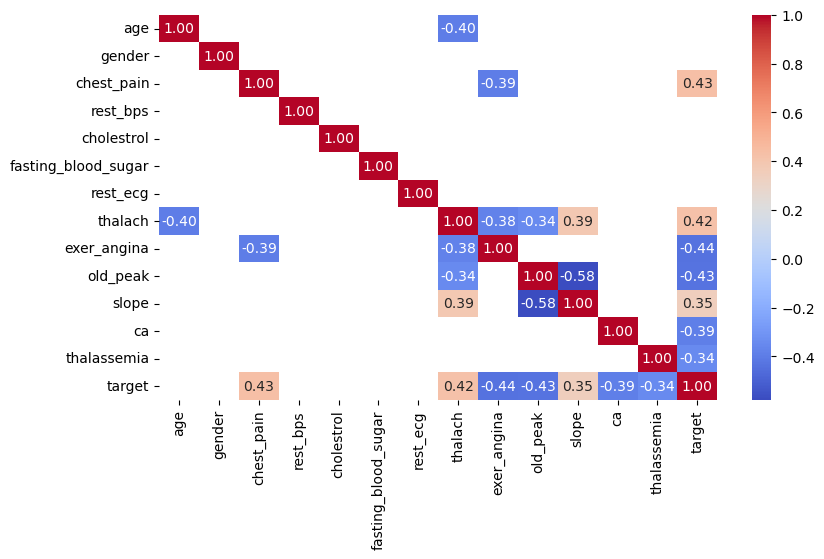

In [9]:
plt.figure(figsize=(9, 5))
sns.heatmap(data=corr[(corr > .3) | (corr < -.3)], cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

- Insights:
    - Age: Is having negative correlation with thalach.
        - meaning as the age increases the heart rate of patient will decrease.
    - Chest Pain: It is having negative correlation with exer_angina and positive with target.
        - meaning as the chest pain increases the chances of having heart diseases increases.
        - meaning the if chest pain increases the exer_angina decreases meaning the blood and oxygen supply has decreased.
    - Thalach: It correlated with many variables in dataset:
        - age is discussed above.
        - exer_angina, old_peak tends decrease if the heart rate increase.
        - if heart rate increases the chances of heart diseases also increase.

In [10]:
corr[(corr > .3) | (corr < -.3) ]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.398522,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.394280,NaN,NaN,NaN,NaN,0.433798
rest_bps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholestrol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fasting_blood_sugar,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_ecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,-0.398522,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.378812,-0.344187,0.386784,NaN,NaN,0.421741
exer_angina,NaN,NaN,-0.394280,NaN,NaN,NaN,NaN,-0.378812,1.000000,NaN,NaN,NaN,NaN,-0.436757
old_peak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.344187,NaN,1.000000,-0.577537,NaN,NaN,-0.430696


<Axes: >

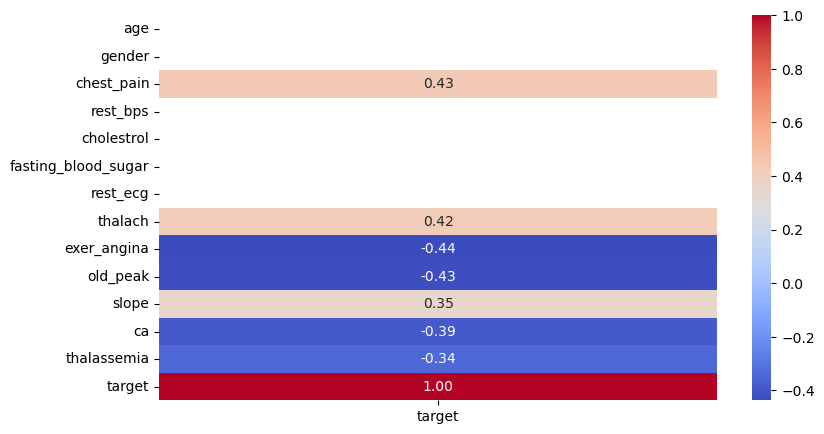

In [11]:
plt.figure(figsize=(9, 5))
corr = pd.DataFrame(df.corr().loc['target'])
sns.heatmap(data=corr[(corr > .3) | (corr < -.3)], fmt='.2f', cmap='coolwarm', annot=True)

- Insights:
    - Target: 
        - chest pain, thalach(heart rate), slope, have positive impact on target if:
            - meaning if these increases the chance of having heart diseases increases.
        - exer_angina, old_peak, ca, thalassemia, have positive impact on target if:
            - meaning if these these factors decrease the chances of heart disease increases.

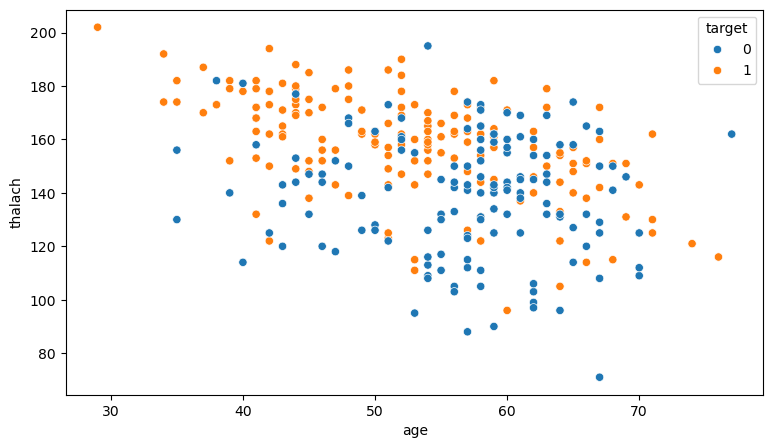

In [12]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x=df.age, y=df['thalach'], hue=df.target)
plt.show()

- So as we saw in correlation, here we can see that:
    - The heart rate decreases as the age increases despite you having heart disease or not.

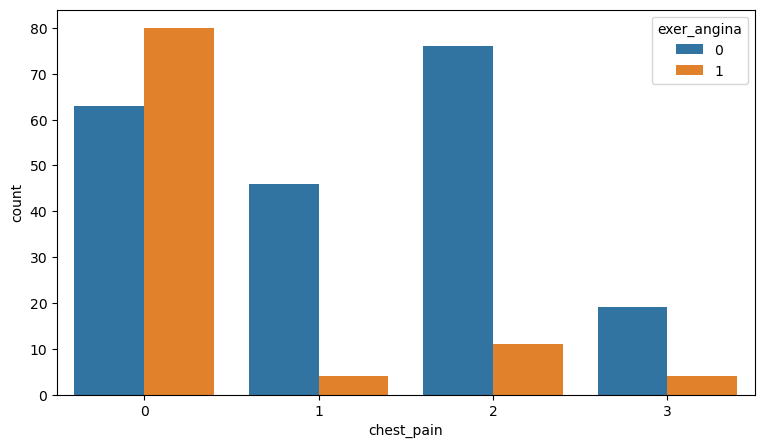

In [13]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df['chest_pain'], hue=df['exer_angina'])
plt.show()

- So as we saw in correlation the exer_angnia increases in the heart patients if the chest pain decreases.
- but it is not same for the non heart patients and the chest pain can be cause of some other factors.

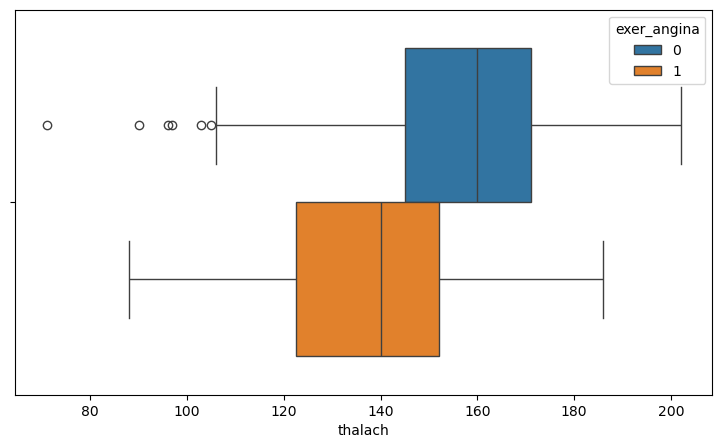

In [14]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=df['thalach'], hue=df['exer_angina'])
plt.show()

- It looks like people who have experienced exer_angina tend to have lower heart rate then other which also decreases their chest pain.

### Step-3 Data sampling

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

<Axes: xlabel='target', ylabel='count'>

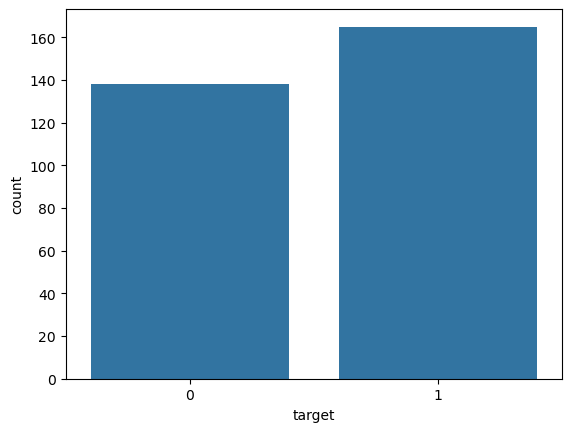

In [16]:
sns.countplot(x=df.target)

- So from the looks of it we will not face the problem of class imbalance.

In [17]:
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
pred =dt.predict(X_train)
print(f"confusion_matrix: ")
print(confusion_matrix(y_train, pred))
print("\nclassification_report")
print(classification_report(y_train, pred))

confusion_matrix: 
[[109   0]
 [  0 133]]

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [20]:
pred_ts =dt.predict(X_test)
print(f"confusion_matrix: ")
print(confusion_matrix(y_test, pred_ts))
print("\nclassification_report")
print(classification_report(y_test, pred_ts))

confusion_matrix: 
[[27  2]
 [ 8 24]]

classification_report
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



- So with no hyper parameter tuning the model is performing good with 84% accuracy.
- And also recall and precision for both the classes is good.

In [23]:
feat_imp = pd.DataFrame()
feat_imp['features'] = df.drop('target', axis=1).columns
feat_imp['imp'] = dt.feature_importances_
feat_imp = feat_imp.sort_values('imp', ascending=False)
feat_imp

,features,imp
2,chest_pain,0.225263
11,ca,0.133084
4,cholestrol,0.109088
0,age,0.105344
9,old_peak,0.092402
8,exer_angina,0.075421
7,thalach,0.068723
3,rest_bps,0.061889
10,slope,0.052482
1,gender,0.034880


In [21]:
params = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [8, 10, 12],
    "min_samples_split": [2, 4, 6],
}
gs = GridSearchCV(estimator=dt, param_grid=params, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_, gs.best_score_, gs.best_index_)

{'criterion': 'log_loss', 'max_depth': 8, 'min_samples_split': 2} 0.7478333333333335 18


In [25]:
dt.set_params(**gs.best_params_)
dt.fit(X_train, y_train)
pred =dt.predict(X_train)
print(f"confusion_matrix: ")
print(confusion_matrix(y_train, pred))
print("\nclassification_report")
print(classification_report(y_train, pred))

confusion_matrix: 
[[107   2]
 [  0 133]]

classification_report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       109
           1       0.99      1.00      0.99       133

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242



In [26]:
pred_ts =dt.predict(X_test)
print(f"confusion_matrix: ")
print(confusion_matrix(y_test, pred_ts))
print("\nclassification_report")
print(classification_report(y_test, pred_ts))

confusion_matrix: 
[[26  3]
 [ 7 25]]

classification_report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



- With hyperparameter tuning now the our model does not seem to be over fitting as the train accuracy is gone down by one percent.
- Even after hyperparameter tuning the model is still having the same accuracy of 84%.
- But the recall for class 1 is increased by 2% and for class 2 it is decreased by 3%.
- So overall the model is performing good.

#### Feature works:
- Will be building the model with most important features.
- And try to obtain the same results for model.